**Homework 4**

(1): 
In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use random.seed(1), prior to starting part (a) to ensure consistent results. (**3 pts**)

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1)

(a) Using the random.normal() function, create a vector, $x$, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, $X$.

In [59]:

np.random.seed(0)

# Generate 100 observations from N(0, 1)
x = np.random.normal(0, 1, 100)
print(x)


[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
  0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
  1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
 -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
 -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
 -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
 -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
 -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
  1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
 -0.31155253  0.05616534 -1.16514984  0.90082649  0

(b) Using the random.normal() function, create a vector, $eps$, containing 100 observations drawn from a N(0, 0.25) distribution i.e. a normal distribution with mean zero and variance 0.25.

In [61]:
np.random.seed(1)

# Generate 100 observations from N(0, 0.25)
eps = np.random.normal(0, 0.25, 100)
print(eps)


[ 0.40608634 -0.1529391  -0.13204294 -0.26824216  0.21635191 -0.57538467
  0.43620294 -0.19030173  0.07975977 -0.06234259  0.36552698 -0.51503518
 -0.0806043  -0.09601359  0.28344236 -0.27497282 -0.04310705 -0.2194646
  0.01055344  0.1457038  -0.27515479  0.28618093  0.22539768  0.12562358
  0.22521399 -0.17093196 -0.03072256 -0.23394236 -0.06697202  0.13258887
 -0.17291519 -0.09918838 -0.17179318 -0.21130141 -0.16781153 -0.00316615
 -0.27932759  0.05860392  0.41495054  0.18551104 -0.04795889 -0.22190724
 -0.18678957  0.42311365  0.01270194 -0.15924891  0.04772887  0.52506378
  0.03003974  0.15430078  0.07504258 -0.08806246 -0.28562955 -0.08733568
 -0.05222356  0.1466558   0.20974585  0.23277552  0.07139683  0.22128529
 -0.18859949  0.31321704  0.12823246 -0.07452321  0.12212954 -0.01889293
  0.28290735  0.3799542   0.54639385 -0.34912408 -0.36102845 -0.12611647
  0.04000927  0.21904223  0.07890874 -0.5055503  -0.076551    0.20699366
  0.05752368  0.1905028  -0.05558204 -0.05018952  0.

(c) Using $x$ and $eps$, generate a vector $y$ according to the model

$Y = −1 + 0.5X + \epsilon$ (3.39)

What is the length of the vector $y$? What are the values of $\beta_0$
and $\beta_1$ in this linear model?



In [58]:
beta_0 = -1
beta_1 = 0.5
y = beta_0 + beta_1 * x + eps
print(y)

[-2.29755968e-01 -4.93794470e-01 -4.09758097e-01  2.68841230e-01
 -3.39948966e-01 -1.44629333e+00 -3.39816678e-01 -1.31410375e+00
 -1.11816405e+00 -7.86547112e-01 -1.27125754e+00 -1.94073399e-01
 -4.07940976e-01 -1.15404148e+00 -6.90431889e-01 -1.16123369e+00
 -2.62634341e-01 -1.50652222e+00 -5.63111722e-01 -1.32482274e+00
 -2.28264915e+00 -8.66981107e-01 -2.49342918e-01 -8.79307073e-01
 -3.29618154e-01 -1.41814183e+00 -5.70208053e-01 -1.00908900e+00
 -5.33427401e-01 -4.94842857e-02 -9.67756363e-01 -9.61898897e-01
 -1.75140741e+00 -1.85276386e+00 -9.75754358e-01 -1.07770820e+00
 -2.54710575e-01 -6.84895423e-01 -9.93198151e-01 -1.13950955e+00
 -1.57091893e+00 -1.73544544e+00 -1.63591356e+00  1.62990608e-01
 -1.12245976e+00 -1.18461185e+00 -1.60694240e+00 -4.56659757e-01
 -1.74882528e+00 -9.35732288e-01 -1.52526247e+00 -1.41525819e+00
 -9.95696418e-01 -1.04357118e+00 -9.03750003e-01 -8.10872873e-01
 -1.00085257e+00 -8.78527598e-01 -1.31280869e+00 -1.46187527e+00
 -1.46550384e+00 -1.42903

Answers: 
$\beta_0$ is equal to -1 
$\beta_1$ is equal to 0 
The vector length of Y is 100. 

(d) Create a scatterplot displaying the relationship between $x$ and $y$. Comment on what you observe.

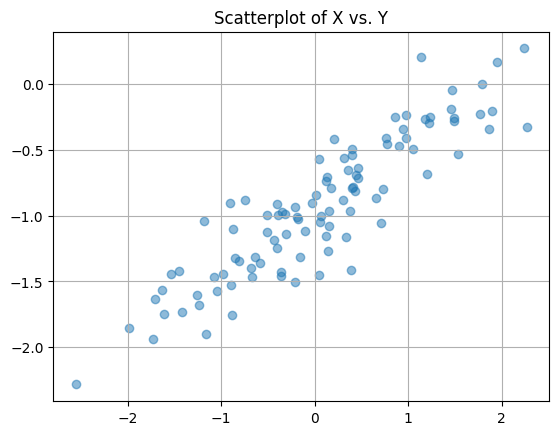

In [65]:
# Create a scatterplot
plt.scatter(x, y, alpha=0.5)
plt.title('Scatterplot of X vs. Y')
plt.grid(True)
plt.show()

(e) Fit a least squares linear model to predict $y$ using $x$. Comment on the model obtained. How do $\hat{\beta_0}$ and
$\hat{\beta_1}$ compare to $\beta_0$ and
$\beta_1$?

In [73]:

dataframe = pd.DataFrame({'x': x, 'y': y})
model = smf.ols(formula='y ~ x', data=dataframe)
fittedmodel = model.fit()
print(fittedmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     410.7
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           7.99e-37
Time:                        23:37:56   Log-Likelihood:                 4.6857
No. Observations:                 100   AIC:                            -5.371
Df Residuals:                      98   BIC:                           -0.1610
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9599      0.023    -41.085      0.0

(f) Repeat (a)–(e) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance
of the normal distribution used to generate the error term in (b). Describe your results.

In [77]:
xf = np.random.normal(0, 1, 100)
epsf = np.random.normal(0, 0.15, 100)
yf = -1 + 0.5 * xf + epsf


dataframef = pd.DataFrame({'x': x, 'y': y})
modelf = smf.ols(formula='y ~ x', data=dataframef)
fittedmodelf = modelf.fit()
print(fittedmodelf.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     410.7
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           7.99e-37
Time:                        23:45:53   Log-Likelihood:                 4.6857
No. Observations:                 100   AIC:                            -5.371
Df Residuals:                      98   BIC:                           -0.1610
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9599      0.023    -41.085      0.0

(g) Repeat (a)–(e) after modifying the data generation process in such a way that there is more noise in the data. The model
(3.39) should remain the same. You can do this by increasing
the variance of the normal distribution used to generate the
error term in (b). Describe your results

In [78]:
xg = np.random.normal(0, 1, 100)
epsg = np.random.normal(0, 0.5, 100)
yg = -1 + 0.5 * xg + epsg


dataframeg = pd.DataFrame({'x': x, 'y': y})
modelg = smf.ols(formula='y ~ x', data=dataframeg)
fittedmodelg = modelg.fit()
print(fittedmodelg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     410.7
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           7.99e-37
Time:                        23:48:29   Log-Likelihood:                 4.6857
No. Observations:                 100   AIC:                            -5.371
Df Residuals:                      98   BIC:                           -0.1610
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9599      0.023    -41.085      0.0

(2): In this exercise, you will implement KNN algorithm and compute Root Mean Square Error (RMSE) for different $k$ values in (a) and (b). The first steps are already completed. (**2 pts**)

In [32]:
import pandas as pd
df = pd.read_csv('train.csv')

Impute missing values

In [33]:
df.isnull().sum()
mean = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean, inplace =True)

mode = df['Outlet_Size'].mode() 
df['Outlet_Size'].fillna(mode[0], inplace =True)

Change Categorical variables to dummy variables

In [34]:
df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
df = pd.get_dummies(df)

Split train and test data

In [35]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

Scale the features

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [30]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

(a) Implement KNN regression and compute the RMSE for a range of values of $k$ from 1 to 25. You may first fit the regression model into train set, i.e., x_train, y_train, and then make predictions on the test set using x_test. Finally, the RMSE between actual y_test and predictions can be calculated.  

In [55]:

rmse_values = []
k_values = list(range(1, 26))

for k in k_values:
    knn_regressor = neighbors.KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(x_train_scaled, y_train)
    y_pred = knn_regressor.predict(x_test_scaled)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)

print(rmse_values)


[2418.322453985591, 2036.7792742419178, 1938.6466827499682, 1880.6090730855442, 1843.8689360512076, 1817.2016347700553, 1789.0537006157804, 1780.962437802146, 1774.6658184173425, 1762.26320533524, 1751.3897204759098, 1744.3492756014653, 1738.3022477193288, 1733.6511173741499, 1726.7442743407871, 1722.4046008417818, 1720.8738345028462, 1720.8192626670009, 1718.9175905955901, 1717.3723761750189, 1714.5122799594117, 1716.0967268892023, 1715.6654390444407, 1714.8304171671857, 1714.2563865525656]


(b) Plot the RMSE values against $k$ values.

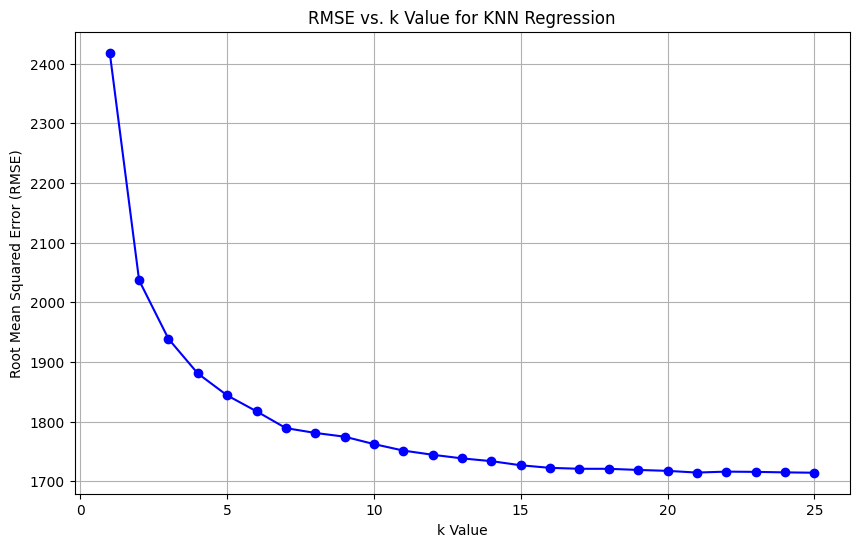

The best k value is 25 with RMSE 1714.26


In [56]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_values, marker='o', linestyle='-', color='b')
plt.title('RMSE vs. k Value for KNN Regression')
plt.xlabel('k Value')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.grid(True)
plt.show()

# Find the best k value (minimum RMSE)
best_k = k_values[rmse_values.index(min(rmse_values))]
print(f"The best k value is {best_k} with RMSE {min(rmse_values):.2f}")